## Homework:
### Burger's equation

In real-world applications, the advection velocity $v$ is usually variable.  For example,

\begin{equation}
\frac{\partial U}{\partial t}+U\frac{\partial U}{\partial x}=0.
\end{equation}

This is called Burger's equation, where the advection velocity depends on the property being advected, i.e., $U$.

1)Let's try the upwind method to solve this equation with an initial Gaussian profile. (U before $\frac{\partial U}{\partial x}$ is velocity at n and j)

2)Please experiment with different grid sizes.

3)Now the solution develops a non-symmetric profile over time.  Can you explain why?

t =  1.12
t =  2.080000000000001
t =  3.040000000000002
t =  4.000000000000003
t =  5.120000000000004
t =  6.0800000000000045
t =  7.040000000000005
t =  8.000000000000005
t =  9.120000000000006
t =  10.080000000000007
Done.


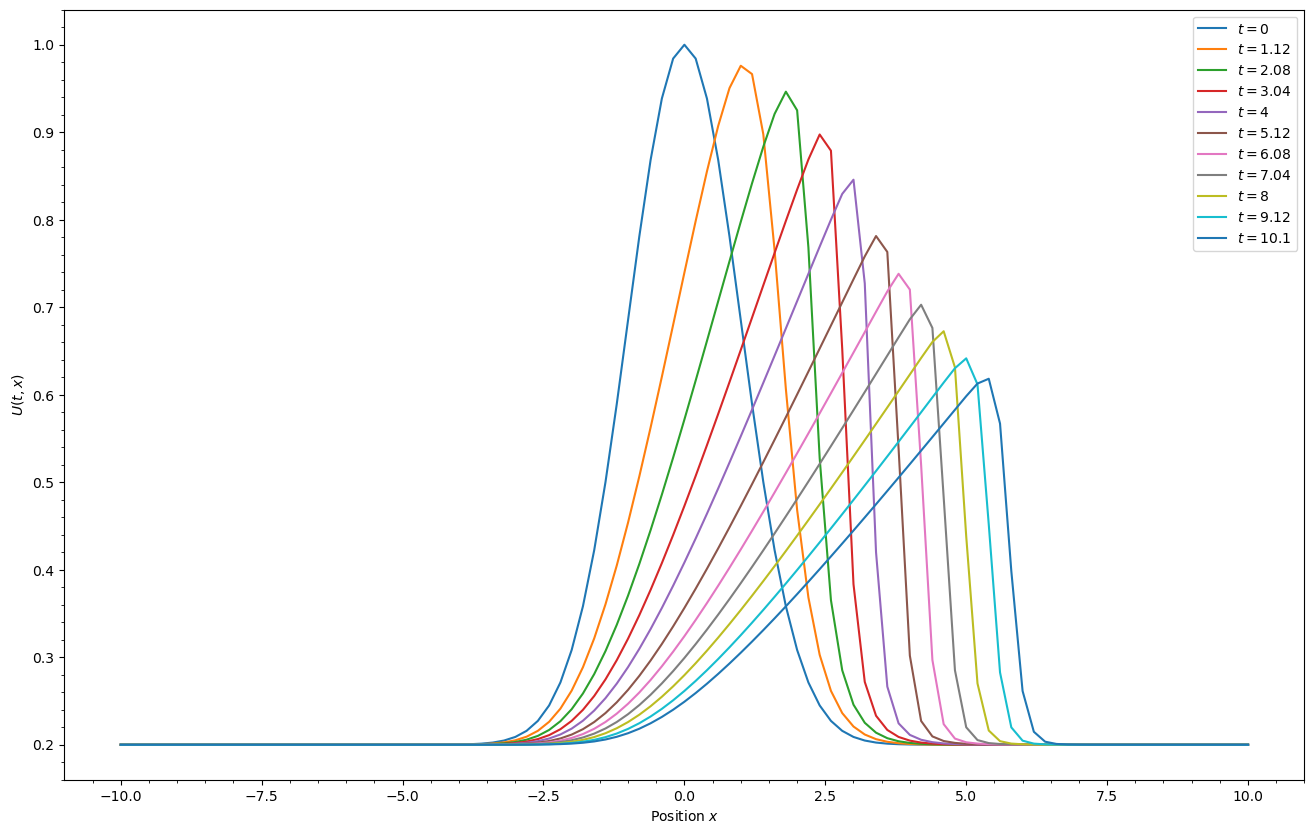

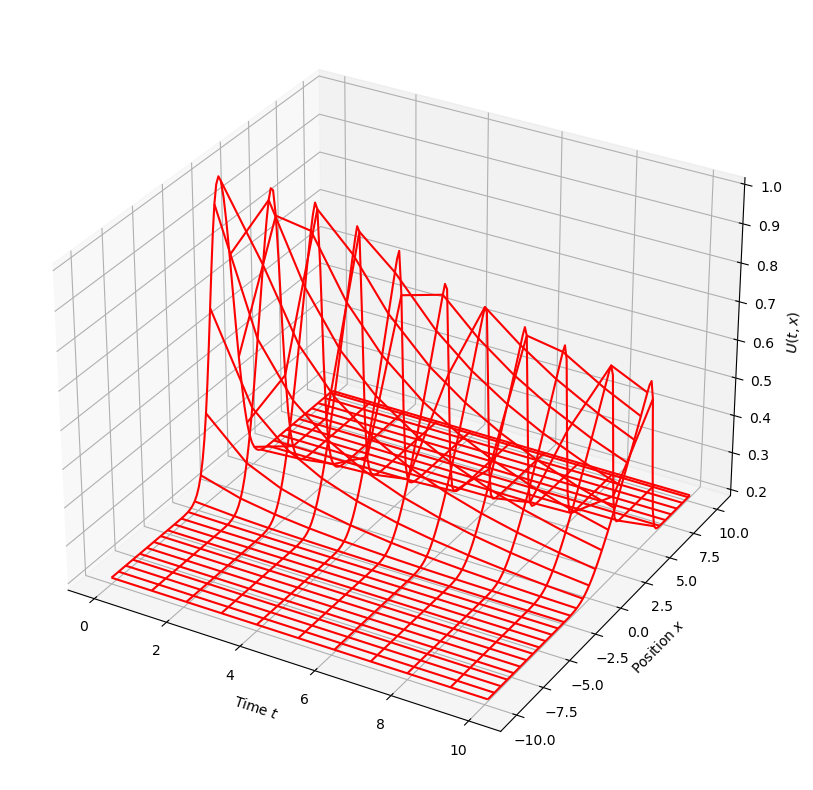

In [27]:
# 1)

import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Model Parameters
xmin = -10.0   # left boundary
xmax = +10.0   # right boundary
Nx = 101      # number of grid points (including boundary)
tend = 10.0    # end time
dtout = 1.0   # time interval for outputs

# Set up the grid.
x = np.linspace(xmin, xmax, Nx)
dx = (xmax - xmin) / (Nx - 1)
dt = 0.8 * dx
U = np.zeros(Nx,)

# Give the initial profile.
t = 0.0
U = 0.2 + 0.8 * np.exp(-0.5 * x**2)


# Prepare for 3D outputs.
tp = [t]
Up = np.copy(U)

# Initiate the plot.
fig = plt.figure(figsize=(16,10))
ax = fig.gca()
ax.plot(x, U, label=r"$t = {:.3G}$".format(t))
ax.set_xlabel(r"Position $x$")
ax.set_ylabel(r"$U(t,x)$")
ax.minorticks_on()

# Begin the simulation.
tout = t + dtout
while t < tend:
    # Backup the previous time step.
    Uold = np.copy(U)

    # Find the state at the next time step.
    for ix in range(1, Nx - 1):
    
        if Uold[ix] > 0:
        
            U[ix]= Uold[ix]- (Uold[ix]*dt)*(Uold[ix]-Uold[ix-1])/dx
            
        else:
            U[ix]=Uold[ix]- (Uold[ix]*dt)*(Uold[ix+1]-Uold[ix])/dx
            
    t += dt

    # Save the data after every dtout.
    if t >= tout:
        plt.plot(x, U, label=r"$t = {:.3G}$".format(t))
        tp.append(t)
        Up = np.vstack((Up, U))
        print("t = ", t)
        tout += dtout

ax.legend()

# Create 3D-view of the solution.
t, x = np.meshgrid(tp, x)
fig3D = plt.figure(figsize=(16,10))
ax3D = fig3D.add_subplot(111, projection='3d')
ax3D.plot_wireframe(t, x, Up.transpose(), color="red")
ax3D.set_xlabel("Time $t$")
ax3D.set_ylabel("Position $x$")
ax3D.set_zlabel(r"$U(t,x)$")

print("Done.")
plt.show()

t =  1.6
t =  3.2
t =  4.800000000000001
t =  6.4
t =  8.0
t =  9.6
t =  11.2
Done.


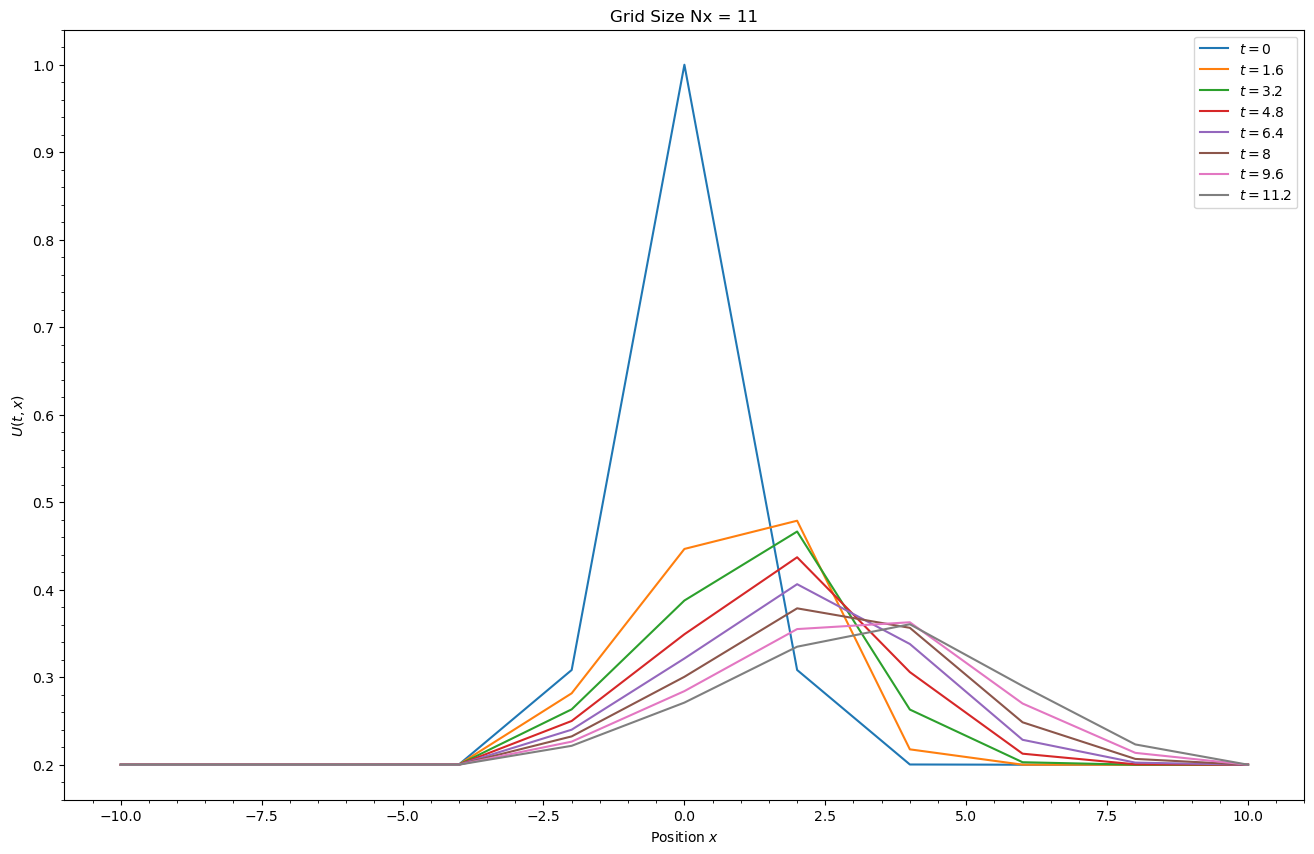

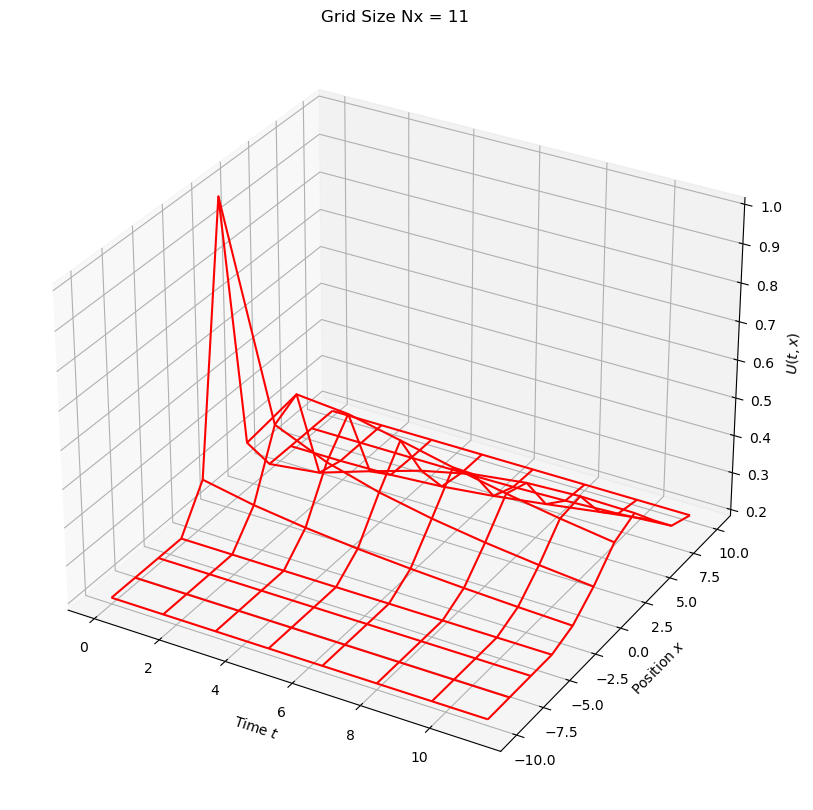

t =  1.0080000000000007
t =  2.0000000000000013
t =  3.0080000000000022
t =  4.000000000000003
t =  5.008000000000004
t =  6.000000000000004
t =  7.008000000000005
t =  8.000000000000005
t =  9.008000000000006
t =  10.000000000000007
Done.


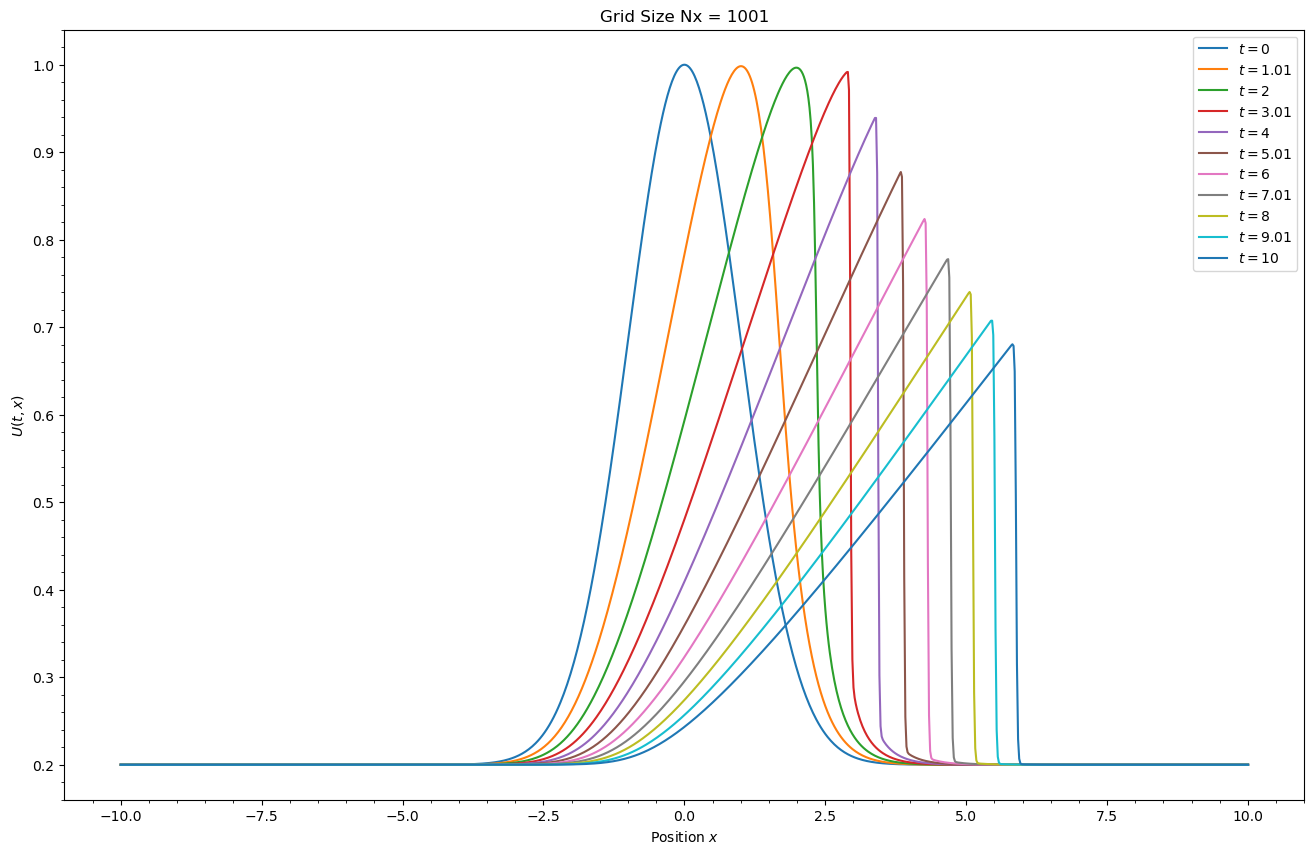

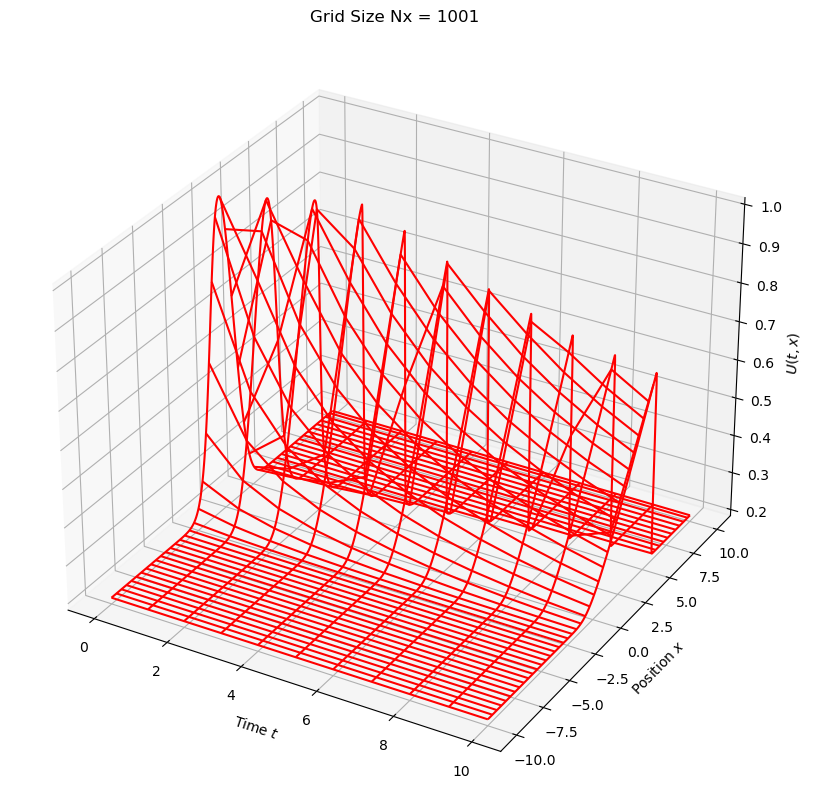

t =  1.0000000000000007
t =  2.0000000000000013
t =  3.000000000000002
t =  4.000000000000003
t =  5.0000000000000036
t =  6.000000000000004
t =  7.000000000000005
t =  8.000000000000005
t =  9.007999999999894
t =  10.007999999999784
Done.


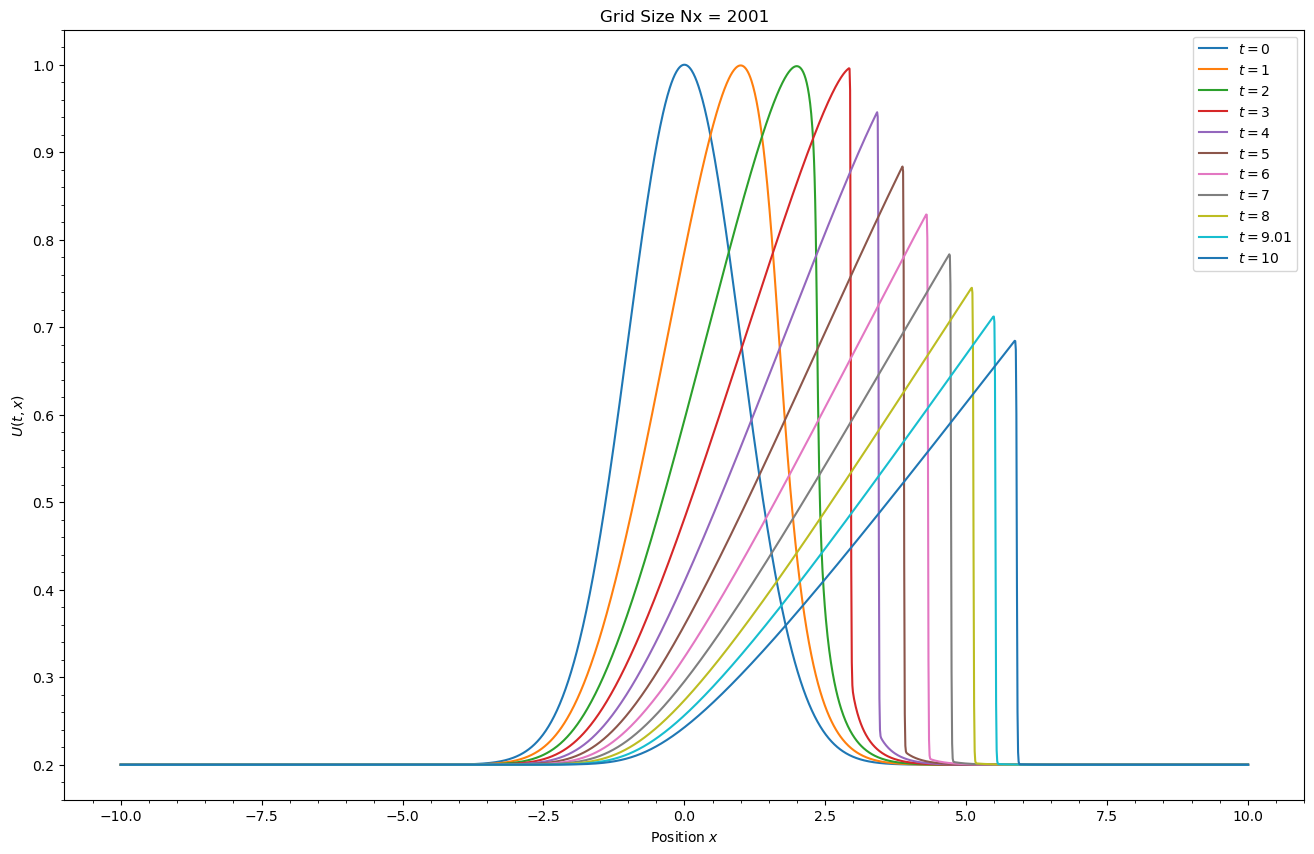

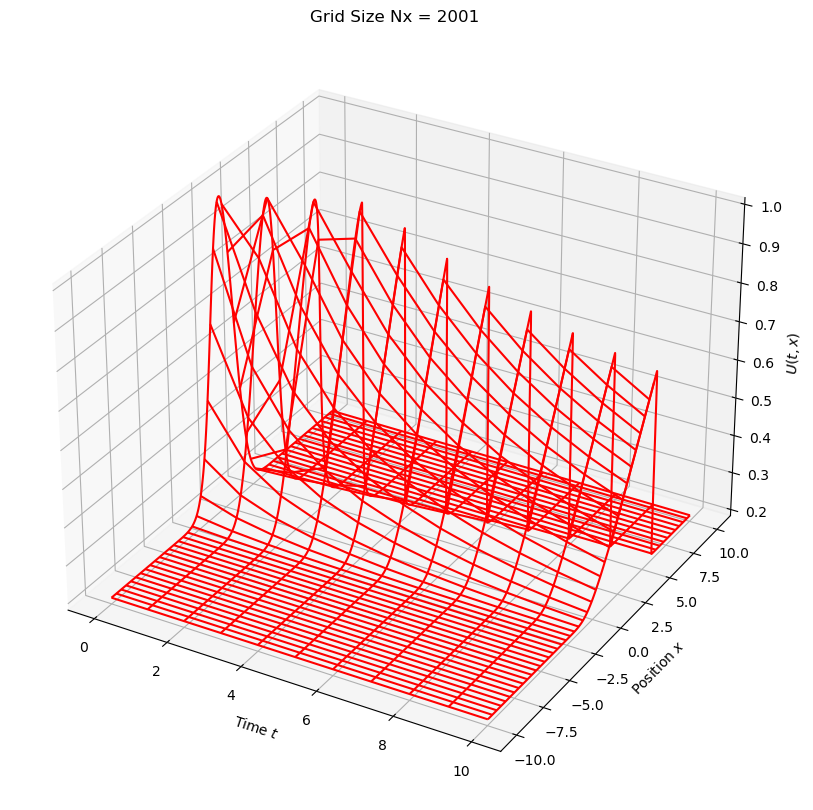

In [28]:
# 2)

import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Model Parameters
xmin = -10.0   # left boundary
xmax = +10.0   # right boundary
Nx = 101      # number of grid points (including boundary)
tend = 10.0    # end time
dtout = 1.0   # time interval for outputs

for Nx in [11,1001,2001]: #Different values of grid size

    # Set up the grid.
    x = np.linspace(xmin, xmax, Nx)
    dx = (xmax - xmin) / (Nx - 1)
    dt = 0.8 * dx
    U = np.zeros(Nx,)

    # Give the initial profile.
    t = 0.0
    U = 0.2 + 0.8 * np.exp(-0.5 * x**2)


    # Prepare for 3D outputs.
    tp = [t]
    Up = np.copy(U)

    # Initiate the plot.
    fig = plt.figure(figsize=(16,10))
    ax = fig.gca()
    ax.plot(x, U, label=r"$t = {:.3G}$".format(t))
    ax.set_xlabel(r"Position $x$")
    ax.set_ylabel(r"$U(t,x)$")
    ax.set_title(f"Grid Size Nx = {Nx}")
    ax.minorticks_on()

    # Begin the simulation.
    tout = t + dtout
    while t < tend:
        # Backup the previous time step.
        Uold = np.copy(U)

        # Find the state at the next time step.
        for ix in range(1, Nx - 1):

            if Uold[ix] > 0:

                U[ix]= Uold[ix]- (Uold[ix]*dt)*(Uold[ix]-Uold[ix-1])/dx

            else:
                U[ix]=Uold[ix]- (Uold[ix]*dt)*(Uold[ix+1]-Uold[ix])/dx

        t += dt

        # Save the data after every dtout.
        if t >= tout:
            plt.plot(x, U, label=r"$t = {:.3G}$".format(t))
            tp.append(t)
            Up = np.vstack((Up, U))
            print("t = ", t)
            tout += dtout

    ax.legend()

    # Create 3D-view of the solution.
    t, x = np.meshgrid(tp, x)
    fig3D = plt.figure(figsize=(16,10))
    ax3D = fig3D.add_subplot(111, projection='3d')
    ax3D.plot_wireframe(t, x, Up.transpose(), color="red")
    ax3D.set_xlabel("Time $t$")
    ax3D.set_ylabel("Position $x$")
    ax3D.set_title(f"Grid Size Nx = {Nx}")
    ax3D.set_zlabel(r"$U(t,x)$")

    print("Done.")
    plt.show()

#3)

This equation is known as the inviscid Burgers' equation since  the diffusion term is absent developing discontinuities (shock waves). 

\begin{equation}
\frac{\partial U}{\partial t}+U\frac{\partial U}{\partial x}=0.
\end{equation}

The term $U\frac{\partial U}{\partial x}$  represents the advection of the variable $U$ with its own velocity. Positive $U$ pushes the solution to the right, and negative $U$ pushes it to the left.

The nonlinearity in the advection term causes the formation of shock waves when the solution encounters abrupt changes.  This directional propagation can lead to asymmetry in the solution.






Note:

As we can see in the second point,choosing the right grid size is crucial to prevent numerical errors and asymmetry in the solution. A small grid size can lead to numerical errors

